In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
plt.style.use('fivethirtyeight')


In [3]:
import statsmodels.api as sm

In [4]:
fileName='HR-Employee-Attrition-UseCase.xlsx'

In [5]:
data = pd.read_excel(io=fileName)

In [6]:
data.shape

(1470, 34)

In [7]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2.0,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3.0,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4.0,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4.0,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1.0,...,4,80,1,6,3,3,2,2,2,2


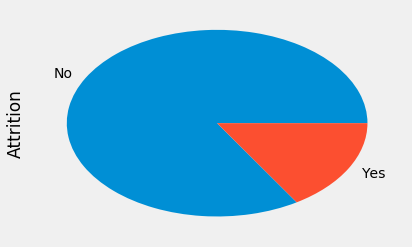

In [179]:
data['Attrition'].value_counts().plot.pie()


In [31]:
data.isnull().sum()[data.isnull().sum()>0]

BusinessTravel             3
EnvironmentSatisfaction    4
Gender                     4
dtype: int64

In [35]:
len(data)-len(data.dropna())

11

## Note:
Total 11 rows have nulls, spread across 3 feats. 

In [9]:
list(data)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

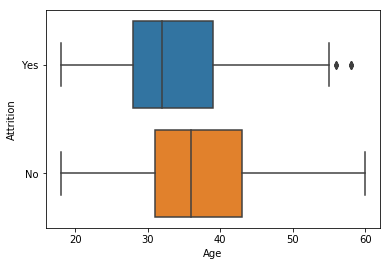

In [14]:
sns.boxplot(y=data.Attrition, x=data.Age)

## Note:
Older employees seem to be sticking better, and younger employees have higher attrition. There are a few outliers though - Some Very old employees have high attrition. 

In [71]:
def distPlot(colName):
    fig, ax = plt.subplots()
    sns.kdeplot(data[data['Attrition']=='Yes'][colName].rename('Attrition:Yes'), ax=ax)
    sns.kdeplot(data[data['Attrition']=='No'][colName].rename('Attrition:No'), ax=ax)
    ax.set_title(colName+' vs Attrition')

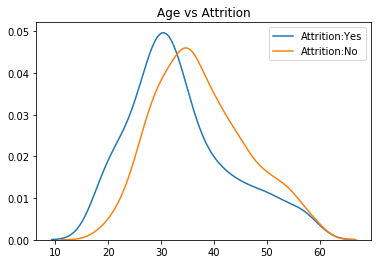

In [72]:
distPlot('Age')

In [65]:
pd.DataFrame([np.percentile(np.asarray(data[data['Attrition']=='Yes']['Age'].values),[10,20,50,90,95,99]),
             np.percentile(np.asarray(data[data['Attrition']=='No']['Age'].values),[10,20,50,90,95,99])]).T

,0,1
0,22.0,27.0
1,26.0,30.0
2,32.0,36.0
3,49.0,51.0
4,53.0,54.0
5,58.0,59.0


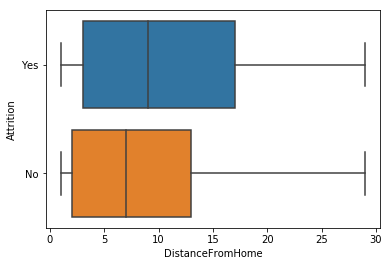

In [36]:
sns.boxplot(x=data['DistanceFromHome'], y=data['Attrition'])

## Note:
The employees who leave seem to be staying farther from home

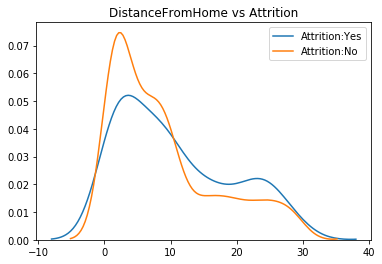

In [73]:
distPlot('DistanceFromHome')

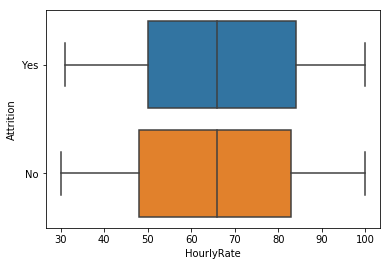

In [37]:
sns.boxplot(x=data['HourlyRate'], y=data['Attrition'])

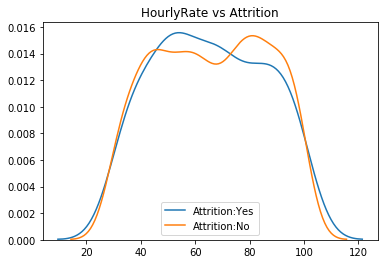

In [74]:
distPlot('HourlyRate')

## Note: 
Hourly Rate seem to be not much difference among users moving out and staying back

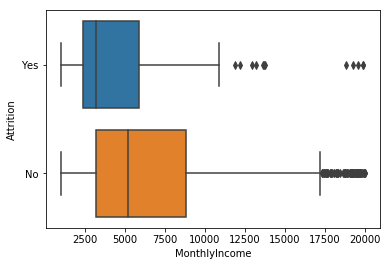

In [38]:
sns.boxplot(x=data['MonthlyIncome'], y=data['Attrition'])

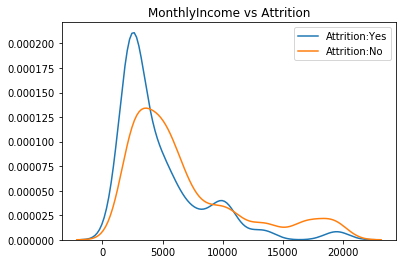

In [75]:
distPlot('MonthlyIncome')

## Note:
Monthly Income seem to have long tail. Also among the users who leave, the monthly income seem to be low. Because of the long tail, we can probably do some col transformation

/Users/dileep/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


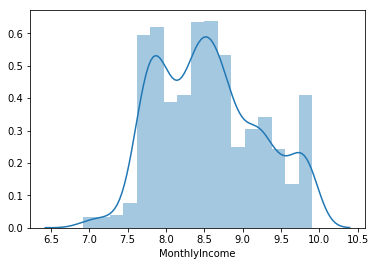

In [83]:
sns.distplot(np.log(data['MonthlyIncome']))

/Users/dileep/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


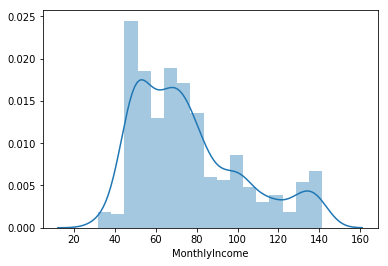

In [84]:
sns.distplot(np.sqrt(data['MonthlyIncome']))

## Note:
Log Transformation looks better for montlyincome as that has lesser skew compared to sqrt

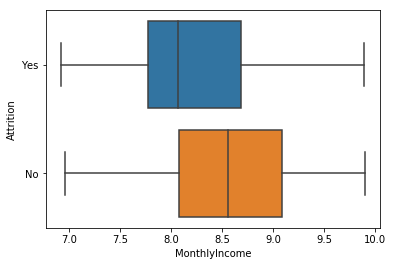

In [82]:
sns.boxplot(x=np.log(data['MonthlyIncome']), y=data['Attrition'])

Text(0.5,1,'MonthlyIncome vs Attrition')

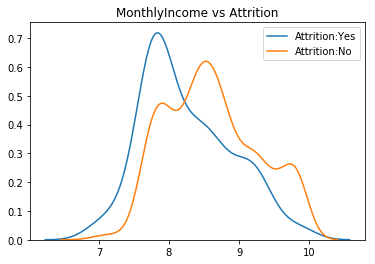

In [81]:
fig, ax = plt.subplots()
sns.kdeplot(np.log(data[data['Attrition']=='Yes']['MonthlyIncome'].rename('Attrition:Yes')), ax=ax)
sns.kdeplot(np.log(data[data['Attrition']=='No']['MonthlyIncome'].rename('Attrition:No')), ax=ax)
ax.set_title('MonthlyIncome vs Attrition')

## Note:
With the transformation, both the above plots look better. Outliers seem to have been handled better

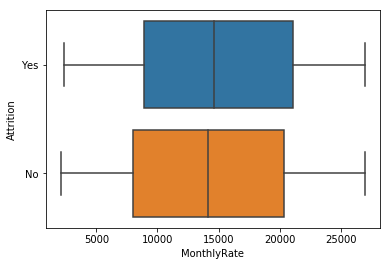

In [85]:
sns.boxplot(x=data['MonthlyRate'], y=data['Attrition'])

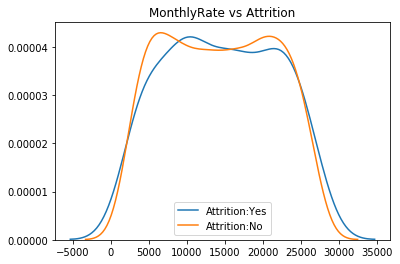

In [86]:
distPlot('MonthlyRate')

## Note:
MonthlyRate also doesn't seem to have much effect on attrition, just like hourlyrate.

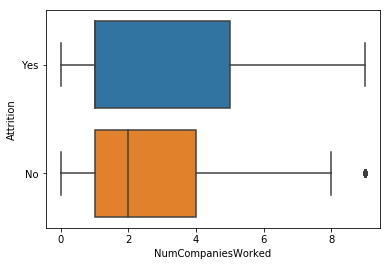

In [87]:
sns.boxplot(x=data['NumCompaniesWorked'], y=data['Attrition'])

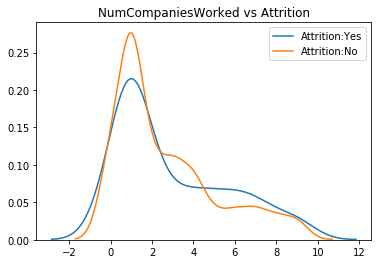

In [88]:
distPlot('NumCompaniesWorked')

## Note:

NumCompaniesWorked seem to have outliers and have long tail. Let's do some transformations on it. There are several zeros in it. So we can't do Log directly. We can try log(1+var)

/Users/dileep/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


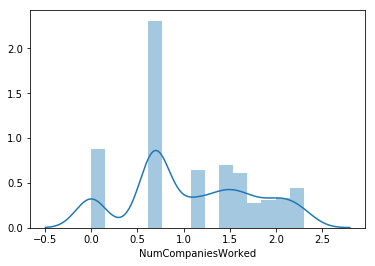

In [97]:
sns.distplot(np.log(data['NumCompaniesWorked']+1))

/Users/dileep/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


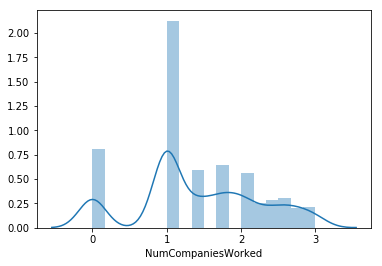

In [93]:
sns.distplot(np.sqrt(data['NumCompaniesWorked']))

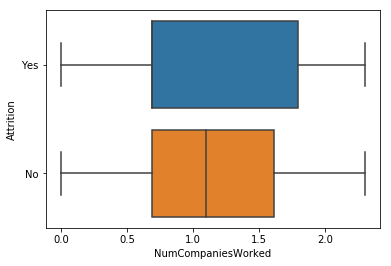

In [98]:
sns.boxplot(x=np.log(1+data['NumCompaniesWorked']), y=data['Attrition'])

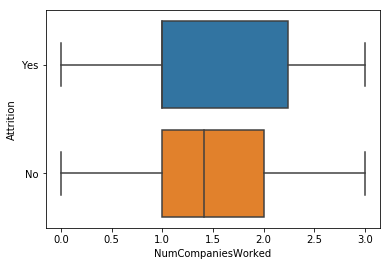

In [95]:
sns.boxplot(x=np.sqrt(data['NumCompaniesWorked']), y=data['Attrition'])

Text(0.5,1,'NumCompaniesWorked vs Attrition')

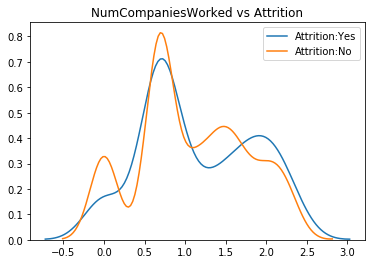

In [99]:
fig, ax = plt.subplots()
sns.kdeplot(np.log(1+data[data['Attrition']=='Yes']['NumCompaniesWorked'].rename('Attrition:Yes')), ax=ax)
sns.kdeplot(np.log(1+data[data['Attrition']=='No']['NumCompaniesWorked'].rename('Attrition:No')), ax=ax)
ax.set_title('NumCompaniesWorked vs Attrition')

Text(0.5,1,'NumCompaniesWorked vs Attrition')

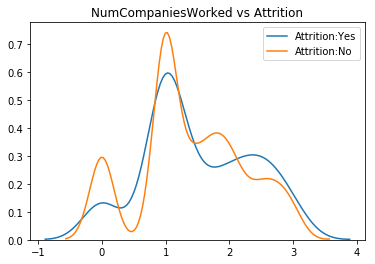

In [94]:
fig, ax = plt.subplots()
sns.kdeplot(np.sqrt(data[data['Attrition']=='Yes']['NumCompaniesWorked'].rename('Attrition:Yes')), ax=ax)
sns.kdeplot(np.sqrt(data[data['Attrition']=='No']['NumCompaniesWorked'].rename('Attrition:No')), ax=ax)
ax.set_title('NumCompaniesWorked vs Attrition')

## Note:
The outliers look handled and the distribution looks less skewed, but the distribution isn't very smooth. Also log(1+x) and sqrt gave very similar results. Let's go with any one. Choosing log(1+x) 

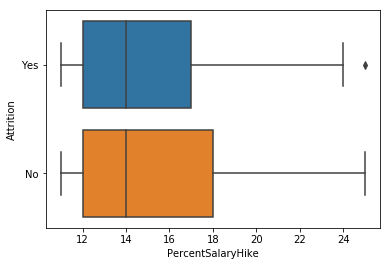

In [102]:
sns.boxplot(data['PercentSalaryHike'], data['Attrition'])

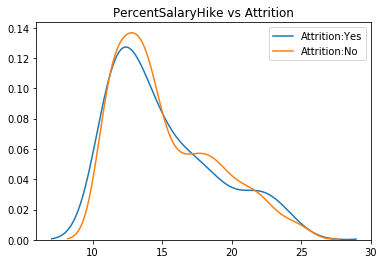

In [101]:
distPlot('PercentSalaryHike')

## Note: 
Percent Salary Hike doesn't seem to be affecting the Attrition by much. 

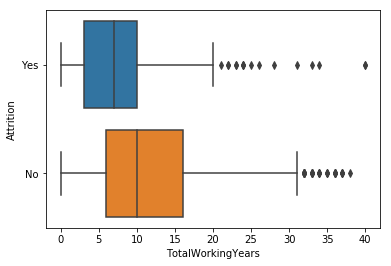

In [103]:
sns.boxplot(data['TotalWorkingYears'], data['Attrition'])

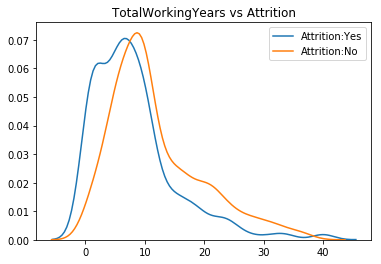

In [104]:
distPlot('TotalWorkingYears')

## Note:
Total Working Years have lot of skew, and also generally employees with lesser work experience look to be having higher attrition. Let's check with some transformation to handle skewness

In [105]:
(data['TotalWorkingYears']==0).sum()

11

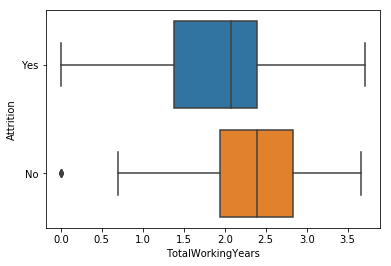

In [106]:
sns.boxplot(np.log(1+data['TotalWorkingYears']), data['Attrition'])

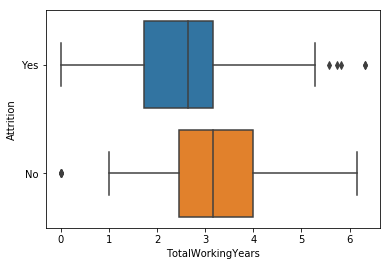

In [107]:
sns.boxplot(np.sqrt(data['TotalWorkingYears']), data['Attrition'])

## Note:
Log transformation seem to have handled outliers better. 

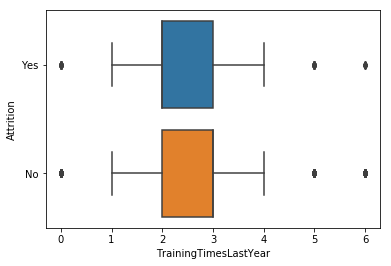

In [108]:
sns.boxplot(data['TrainingTimesLastYear'], data['Attrition'])

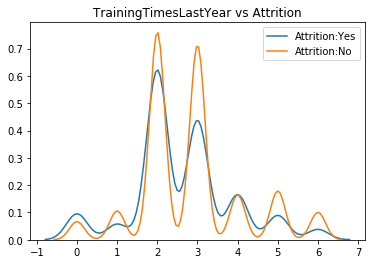

In [109]:
distPlot('TrainingTimesLastYear')

## Note:
The dist seem very wobbly, but we see that TrainingTimesLastYear hardly has any affect

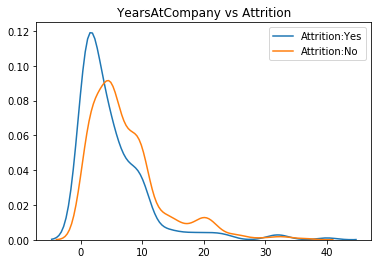

In [110]:
distPlot('YearsAtCompany')

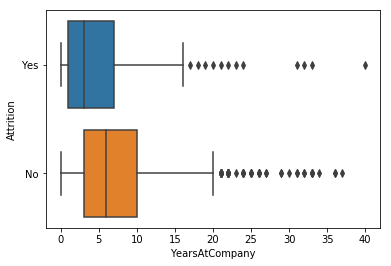

In [111]:
sns.boxplot(data['YearsAtCompany'], data['Attrition'])

Text(0.5,1,'Log Transformation')

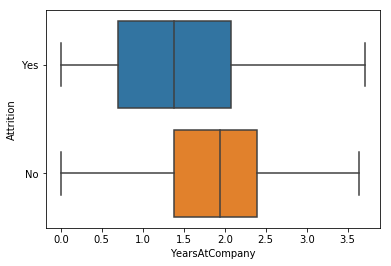

In [119]:

sns.boxplot(np.log(1+data['YearsAtCompany']), data['Attrition'])
ax.set_title('Log Transformation')


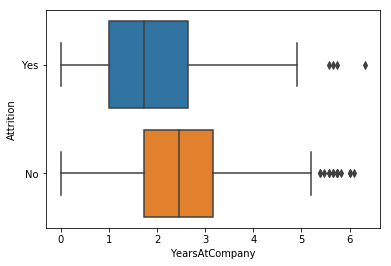

In [114]:
sns.boxplot(np.sqrt(data['YearsAtCompany']), data['Attrition'])

## Note
log(1+x) seem to be a good transformation to handle outliers. Attrition seem to be high for employees in their early years. 

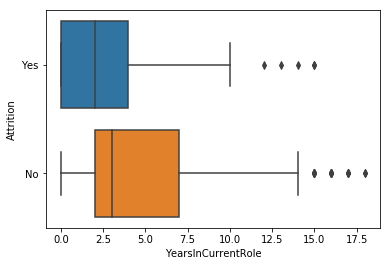

In [120]:
sns.boxplot(data['YearsInCurrentRole'], data['Attrition'])

Text(0.5,1,'Log Transformation')

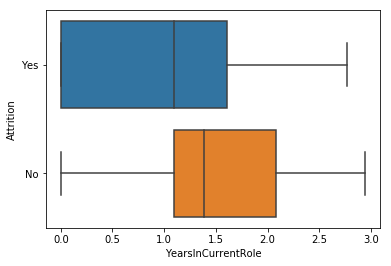

In [121]:

sns.boxplot(np.log(1+data['YearsInCurrentRole']), data['Attrition'])
ax.set_title('Log Transformation')


Text(0.5,1,'YearsInCurrentRole vs Attrition')

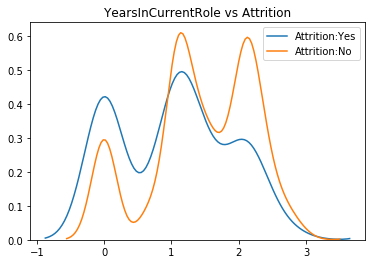

In [122]:
fig, ax = plt.subplots()
sns.kdeplot(np.log(1+data[data['Attrition']=='Yes']['YearsInCurrentRole'].rename('Attrition:Yes')), ax=ax)
sns.kdeplot(np.log(1+data[data['Attrition']=='No']['YearsInCurrentRole'].rename('Attrition:No')), ax=ax)
ax.set_title('YearsInCurrentRole vs Attrition')

## Note:
For yearsincurrentrole, attrition seem to be very low in employees after they spend 11+ years. A log(1+x) transformation handled outliers very well

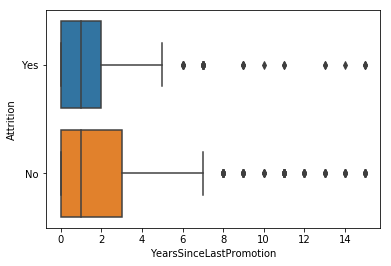

In [123]:
sns.boxplot(data['YearsSinceLastPromotion'], data['Attrition'])

Text(0.5,1,'Log Transformation')

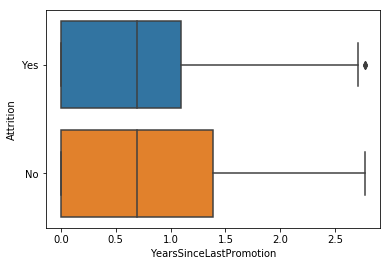

In [124]:

sns.boxplot(np.log(1+data['YearsSinceLastPromotion']), data['Attrition'])
ax.set_title('Log Transformation')


Text(0.5,1,'YearsSinceLastPromotion vs Attrition')

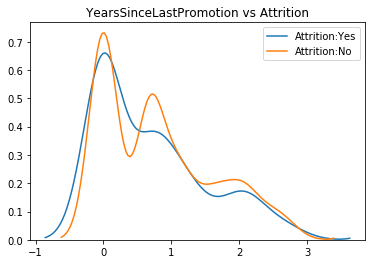

In [125]:
fig, ax = plt.subplots()
sns.kdeplot(np.log(1+data[data['Attrition']=='Yes']['YearsSinceLastPromotion'].rename('Attrition:Yes')), ax=ax)
sns.kdeplot(np.log(1+data[data['Attrition']=='No']['YearsSinceLastPromotion'].rename('Attrition:No')), ax=ax)
ax.set_title('YearsSinceLastPromotion vs Attrition')

In [26]:
pd.crosstab(data['Attrition'],data['BusinessTravel'],normalize='index')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,0.112104,0.168968,0.718928
Yes,0.050847,0.288136,0.661017


In [126]:
from scipy import stats

In [ ]:
scipy.stats.chi2_contingency(cont)


In [162]:
catCols=['Education',
        'EnvironmentSatisfaction',
        'JobInvolvement',
        'JobSatisfaction',
        'PerformanceRating',
        'RelationshipSatisfaction',
        'WorkLifeBalance']

In [28]:
pd.crosstab(data['Attrition'],data['Education'],normalize='index')

Education,1,2,3,4,5
Attrition,,,,,
No,0.112733,0.193025,0.383617,0.275750,0.034874
Yes,0.130802,0.185654,0.417722,0.244726,0.021097


In [129]:
pd.crosstab(data['Attrition'],data['Education'])

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [130]:
from sklearn.feature_selection import chi2

In [137]:
modelData=data.dropna()

In [160]:
catCols = list(modelData.dtypes[modelData.dtypes=='object'].index.values) + catCols

## Remove Attrition from catCols as that's the y-var
catCols=catCols[1:]

modelData[catCols].shape

In [145]:
from itertools import compress

In [163]:
## Selected feats based on chi-square
list(compress(catCols,chi2(modelData[catCols],modelData['Attrition'])[1]<0.01))

['EnvironmentSatisfaction', 'JobSatisfaction']

In [164]:
## Dropped feats based on chi-square
list(compress(catCols,chi2(modelData[catCols],modelData['Attrition'])[1]>=0.01))

['Education',
 'JobInvolvement',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [167]:
pd.crosstab(data['Attrition'],data['JobSatisfaction'],normalize='index')

JobSatisfaction,1,2,3,4
Attrition,,,,
No,0.180860,0.189781,0.299270,0.330089
Yes,0.278481,0.194093,0.308017,0.219409


In [168]:
from sklearn.feature_extraction import DictVectorizer as DV


In [169]:
catCols1=list(modelData.dtypes[modelData.dtypes=='object'].index.values)

In [171]:
catCols1[1]

'BusinessTravel'

In [188]:
catCols[0:2]

['Education', 'EnvironmentSatisfaction']

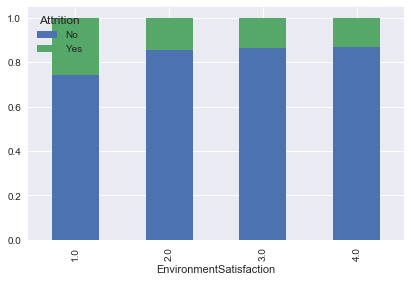

In [198]:
pd.crosstab(modelData['EnvironmentSatisfaction'], 
            modelData['Attrition'], normalize='index').plot(kind="bar", 
                 #figsize=(6,6),
                 stacked=True)

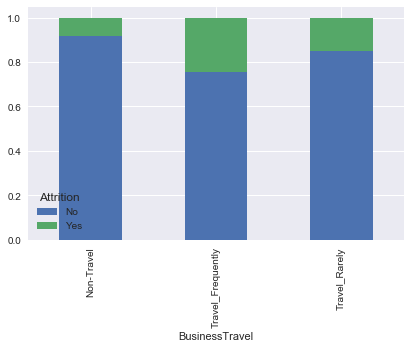

In [199]:
pd.crosstab(modelData['BusinessTravel'], 
            modelData['Attrition'], normalize='index').plot(kind="bar", 
                 #figsize=(6,6),
                 stacked=True)

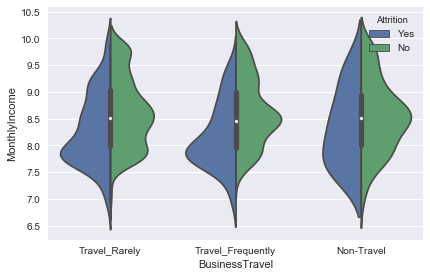

In [203]:
sns.violinplot(x=modelData['BusinessTravel'],
              y=np.log(modelData['MonthlyIncome']),
              hue=modelData['Attrition'],
              split=True)

## Note:
Looking at violin plot with Monthly income and Travel, as they both seem to be important features.
1. Among employees with low income (<7), most people seem to be non-traveling. 
2. Among Non-travel group, higher income employees have more attrition. But in other travel groups, higher income group have very low attrition. 


In [204]:
from statsmodels.graphics.mosaicplot import mosaic


In [202]:
dummy = mosaic(train,["Survived","Sex","Pclass"])

Object `mosaic` not found.


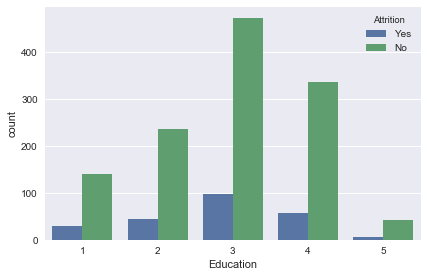

In [190]:
sns.countplot('Education',hue='Attrition',data=modelData)

In [ ]:
for var in catCols1:
    vectorizer=DV(sparse)

In [ ]:

vectorizer = DV( sparse = False )
vec_x_cat_train = vectorizer.fit_transform( x_cat_train )
vec_x_cat_test = vectorizer.transform( x_cat_test ) 

## Decision Tree

In [11]:

from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [32]:
data.dropna(inplace=True)

In [33]:
y=le.fit_transform(data['Attrition'])

In [34]:
dtr = tree.DecisionTreeRegressor(max_depth=3)

In [23]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)>

In [35]:
X=pd.get_dummies(data.drop('Attrition', axis=1), drop_first=True)

In [36]:
X.shape

(1459, 46)

In [37]:

dtr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
dot_data = tree.export_graphviz(dtr, out_file=None,  
                     feature_names=X.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  

In [43]:
from pydotplus import graph_from_dot_data

In [45]:
graph = graph_from_dot_data(dot_data)  

In [50]:
%matplotlib inline

In [51]:
graph.write_png('decision_tree.png')

True